In [3]:
# 21BDS0300
# K.P.Hari chandana

**exploratory data analysis theory assignment**

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import scipy.cluster.hierarchy as sch


In [5]:
from google.colab import files
uploaded = files.upload()


Saving NaturalGas.csv to NaturalGas (1).csv


In [6]:
import pandas as pd
df = pd.read_csv('NaturalGas.csv')


In [14]:
df.head()

,rownames,state,statecode,year,consumption,price,eprice,oprice,lprice,heating,income
0,1,NY,35,1967,313656,1.42,2.98,7.40,1.47,6262,10903.75
1,2,NY,35,1968,319282,1.38,2.91,7.77,1.42,6125,11370.02
2,3,NY,35,1969,331326,1.37,2.84,7.96,1.38,6040,11578.68
3,4,NY,35,1970,346533,1.40,2.87,8.33,1.37,6085,11586.77
4,5,NY,35,1971,352085,1.50,3.07,8.80,1.40,5907,11657.42


In [7]:
# Explore the dataset
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("Summary Statistics:")
print(df.describe())


Dataset Shape: (138, 11)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     138 non-null    int64  
 1   state        138 non-null    object 
 2   statecode    138 non-null    int64  
 3   year         138 non-null    int64  
 4   consumption  138 non-null    int64  
 5   price        138 non-null    float64
 6   eprice       138 non-null    float64
 7   oprice       138 non-null    float64
 8   lprice       138 non-null    float64
 9   heating      138 non-null    int64  
 10  income       138 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.0+ KB
None
Summary Statistics:
         rownames  statecode         year    consumption       price  \
count  138.000000  138.00000   138.000000     138.000000  138.000000   
mean    69.500000   27.00000  1978.000000  252901.478261    3.422319   
std   

In [8]:
# Data Handling: Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
rownames       0
state          0
statecode      0
year           0
consumption    0
price          0
eprice         0
oprice         0
lprice         0
heating        0
income         0
dtype: int64


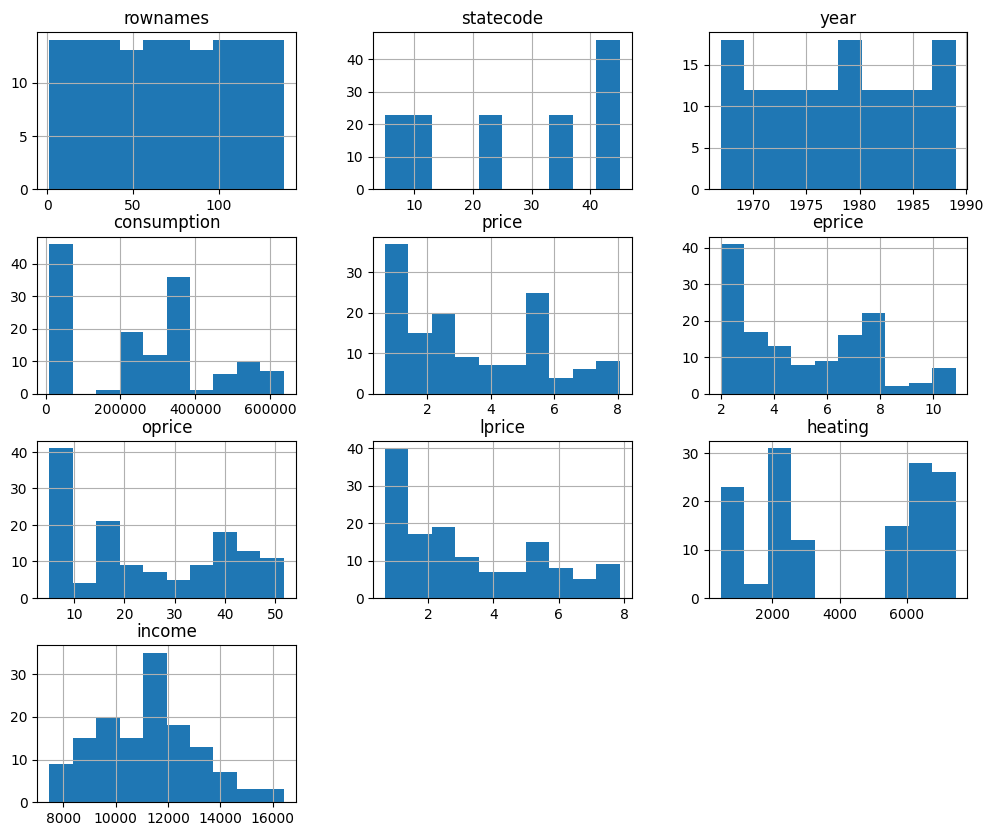

In [9]:
# Univariate Analysis: Distribution of each numerical feature
df.hist(figsize=(12, 10))
plt.show()

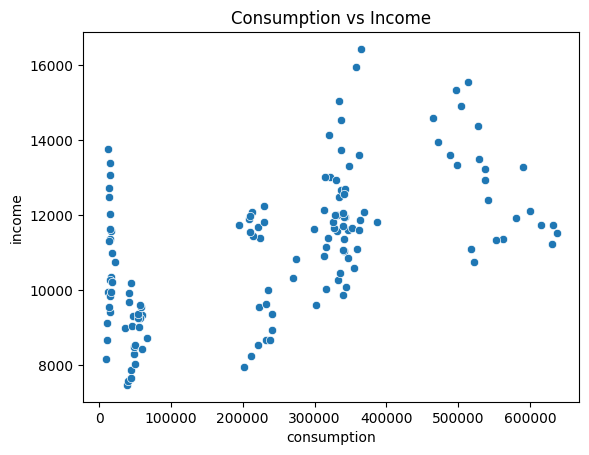

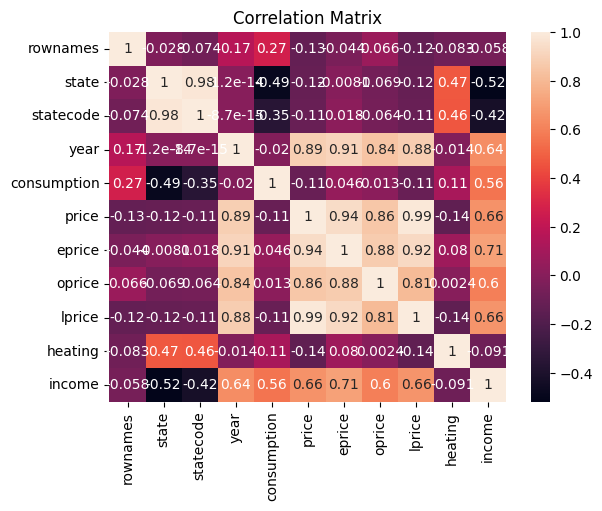

In [16]:
# Scatter plot
sns.scatterplot(x='consumption', y='income', data=df)
plt.title('Consumption vs Income')
plt.show()
from sklearn.preprocessing import LabelEncoder

# Encoding the 'statecode' column to numeric
label_encoder = LabelEncoder()
df['state'] = label_encoder.fit_transform(df['state'])

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

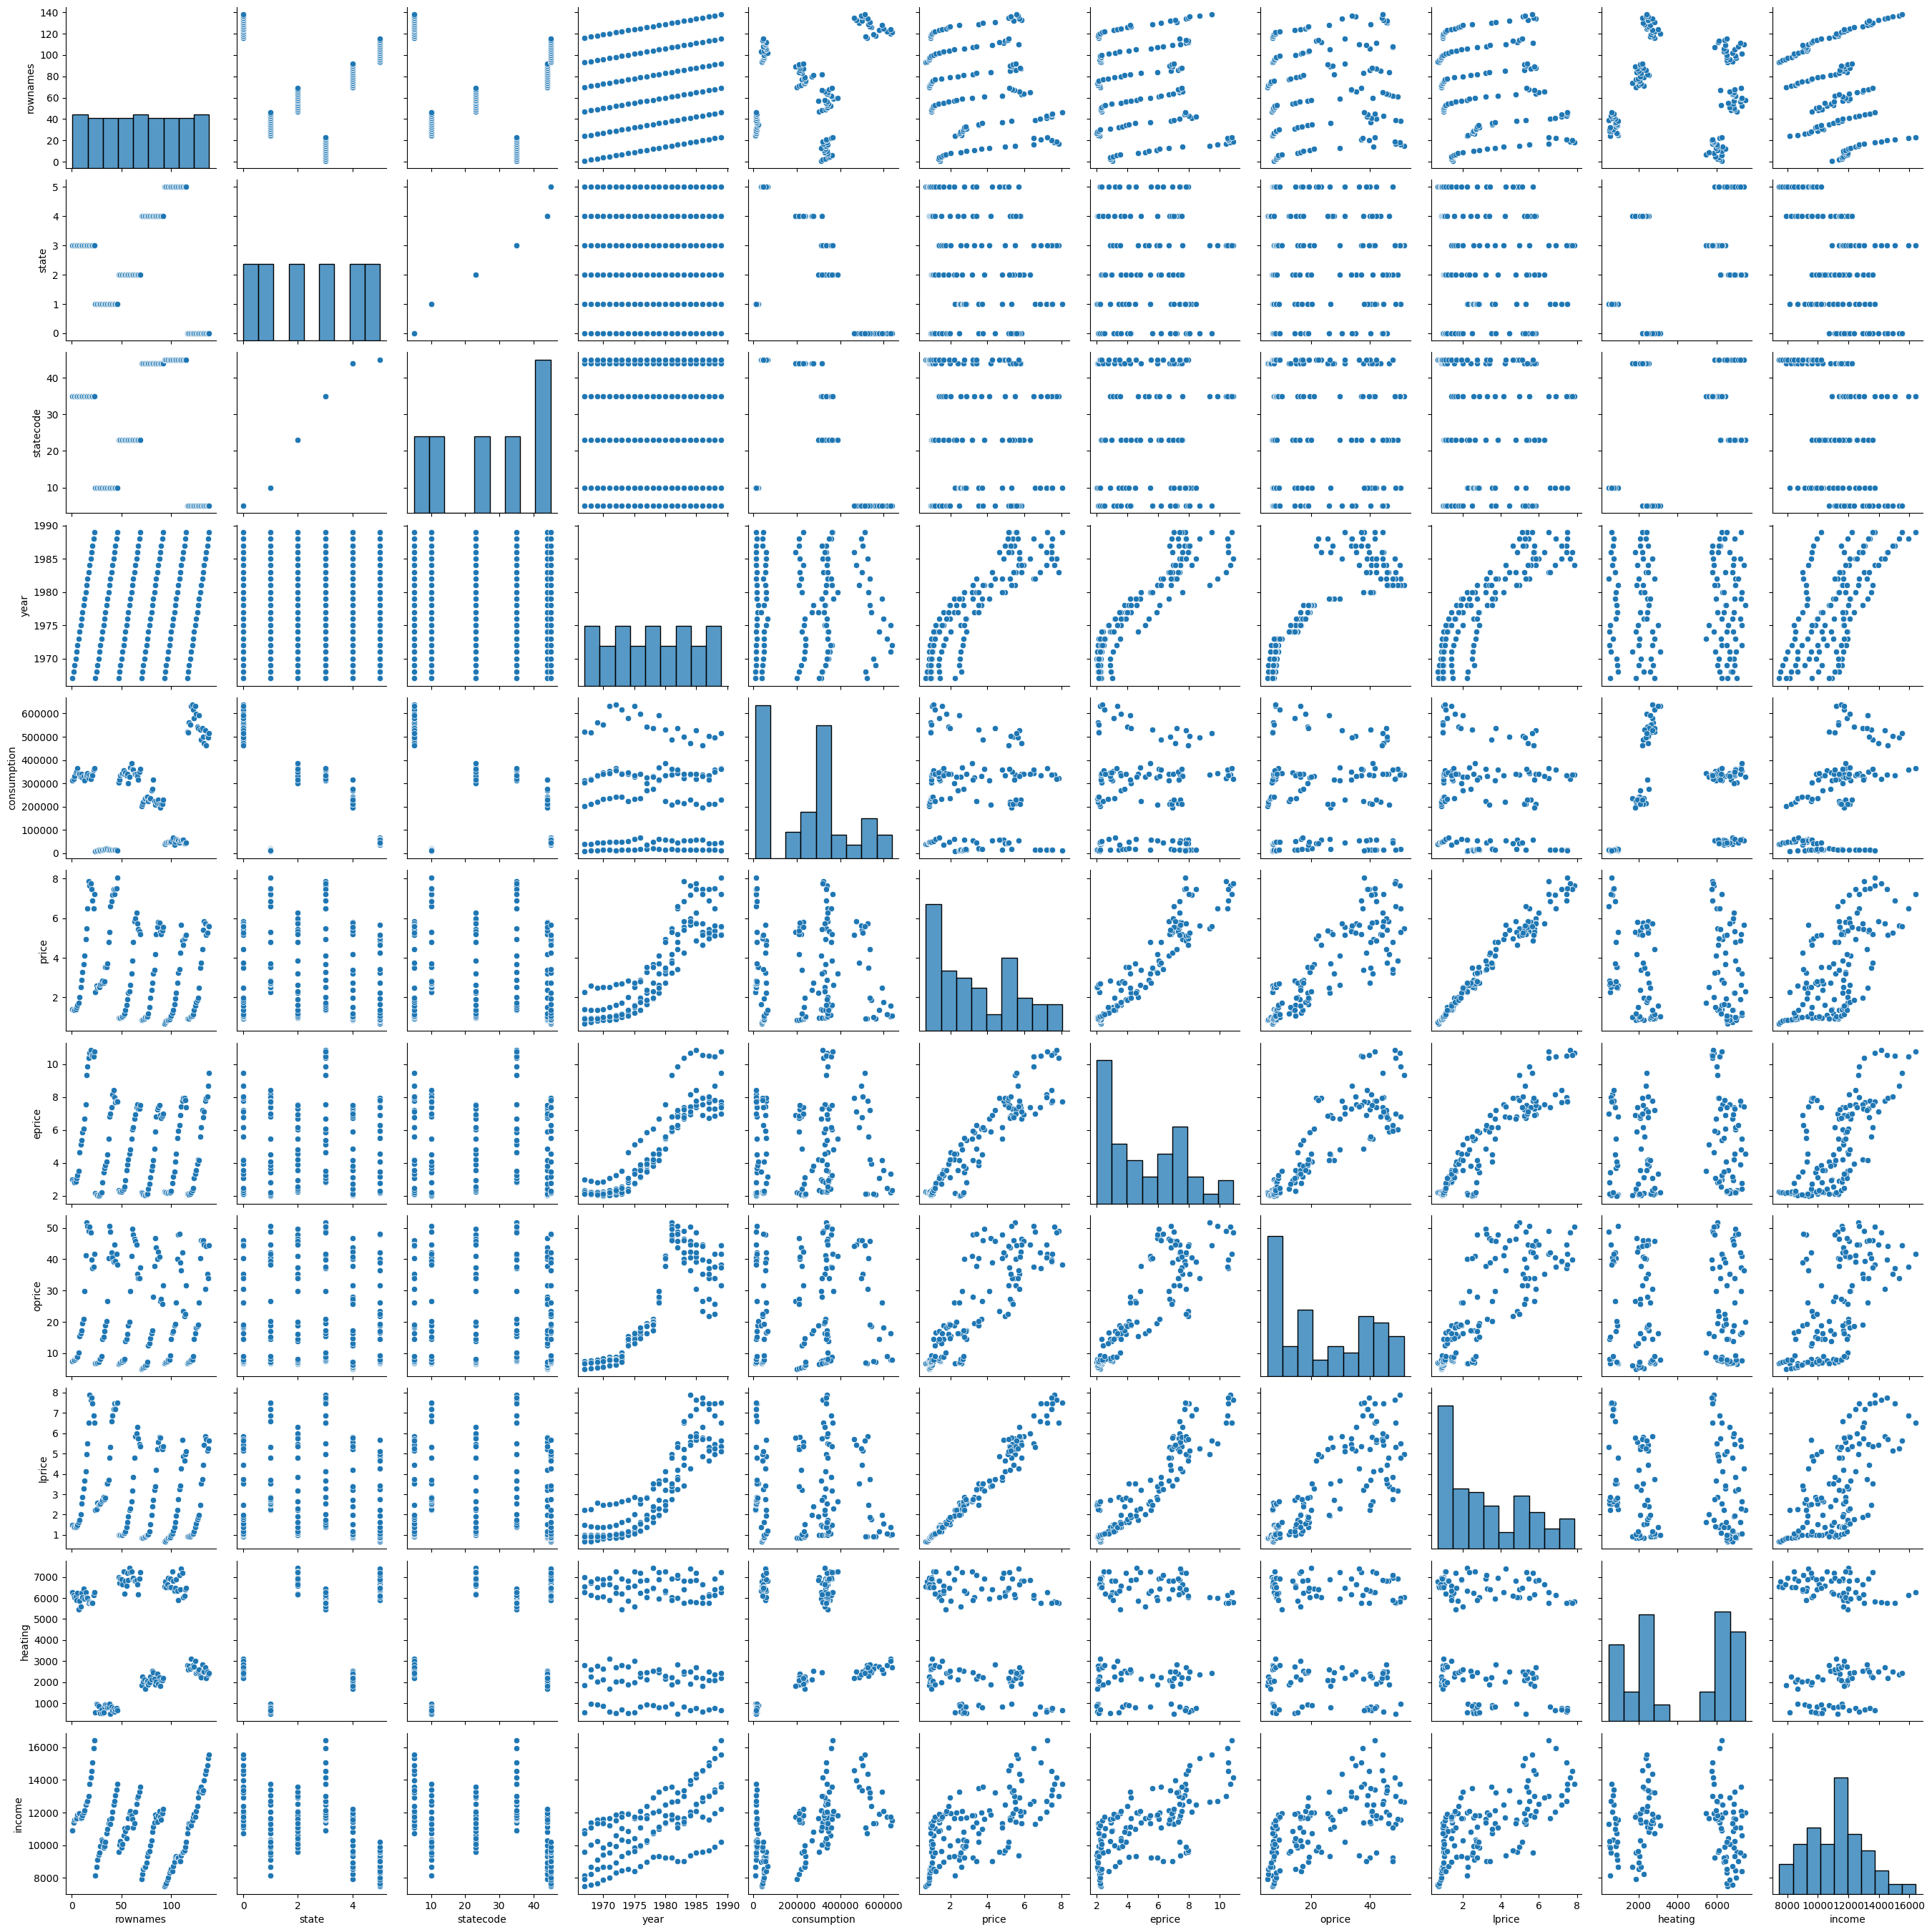

In [17]:
# Multivariate Analysis: Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

In [18]:
# Outlier Detection using Z-scores
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print("Z-scores for detecting outliers:")
print(z_scores)
outliers = (z_scores > 3).all(axis=1)
print(f"Outliers detected in rows: {df[outliers]}")

Z-scores for detecting outliers:
     rownames    state  statecode      year  consumption     price    eprice  \
0    1.719545  0.29277   0.511798  1.658312     0.330532  0.926424  0.807300   
1    1.694442  0.29277   0.511798  1.507557     0.361140  0.944931  0.834553   
2    1.669339  0.29277   0.511798  1.356801     0.426664  0.949558  0.861806   
3    1.644236  0.29277   0.511798  1.206045     0.509397  0.935678  0.850126   
4    1.619133  0.29277   0.511798  1.055290     0.539602  0.889410  0.772260   
..        ...      ...        ...       ...          ...       ...       ...   
133  1.619133  1.46385   1.407445  1.055290     1.493911  1.063081  1.061494   
134  1.644236  1.46385   1.407445  1.206045     1.150140  0.794729  1.127681   
135  1.669339  1.46385   1.407445  1.356801     1.363220  0.850250  1.158827   
136  1.694442  1.46385   1.407445  1.507557     1.328755  1.026067  1.415786   
137  1.719545  1.46385   1.407445  1.658312     1.421994  1.002933  1.711679   

      

**PCA**

PCA Explained Variance Ratios: [0.46890804 0.24156154]


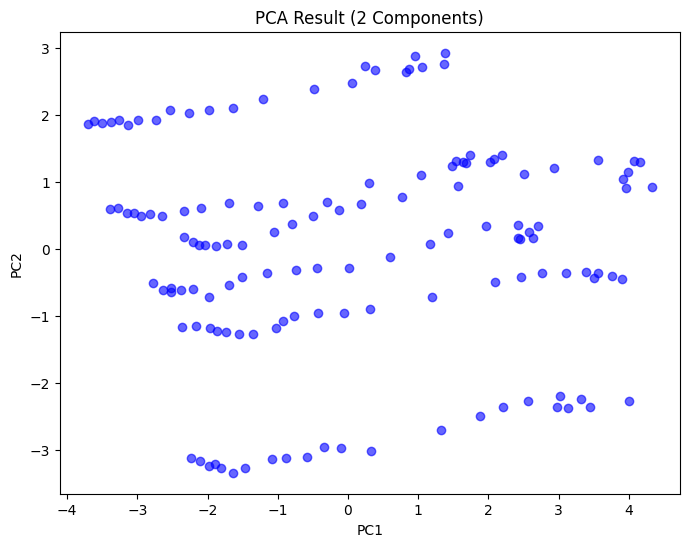

In [19]:
# Standardizing the data for PCA, KMeans, and KNN
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)
print("PCA Explained Variance Ratios:", pca.explained_variance_ratio_)

# Plotting PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue', alpha=0.6)
plt.title('PCA Result (2 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**K-means**

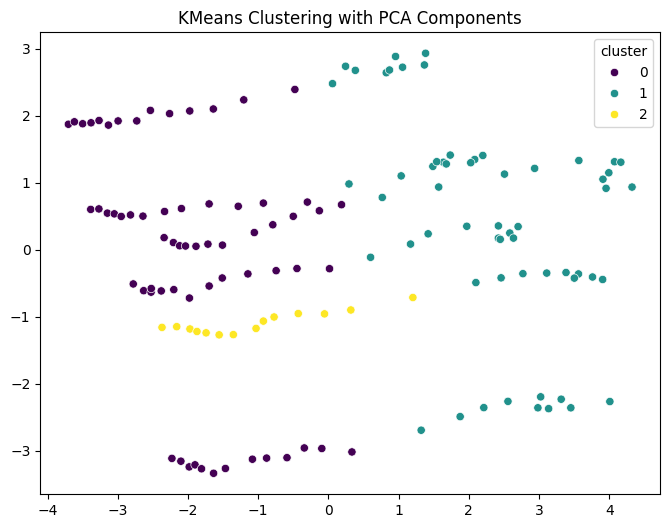

In [20]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_df)

# Visualizing KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster'], palette='viridis')
plt.title('KMeans Clustering with PCA Components')
plt.show()

**KNN**

In [23]:
# KNN Model: Assuming 'income' as the target and rest as features
X = df.drop(columns=['income'])
y = df['income']

from sklearn.neighbors import KNeighborsRegressor
# Using KNeighborsRegressor for continuous target variable
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# Predictions
y_pred = knn.predict(X)

# Evaluate the model (using R2 score)
print("KNN Regressor R-squared score:", knn.score(X, y))


KNN Regressor R-squared score: 0.6459521868956075


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1277850.4097044284
Mean Absolute Error: 845.7664009661836


**heirarchial clustering**

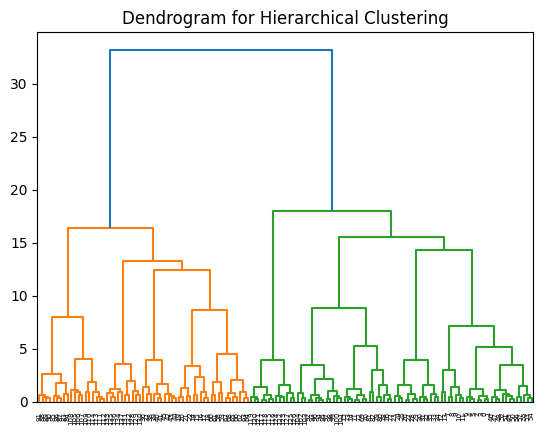

In [25]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

**linear regression model**

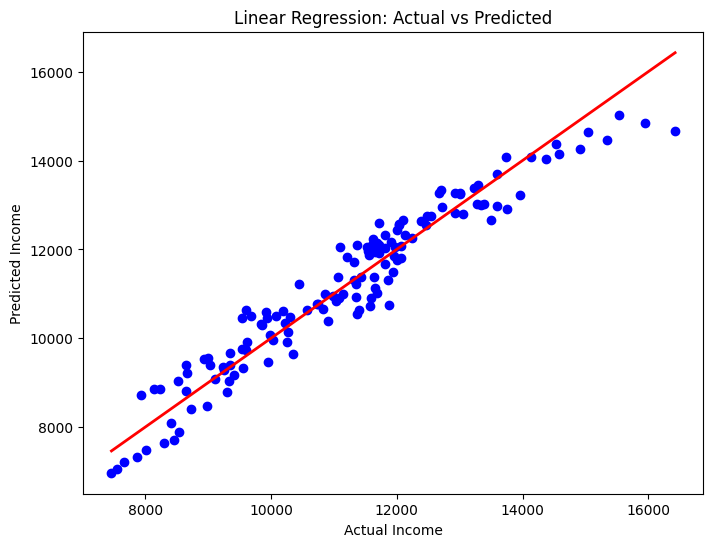

Linear Regression MSE: 255072.8635125928


In [26]:
lr = LinearRegression()
lr.fit(X, y)

# Predictions
y_lr_pred = lr.predict(X)

# Plot Linear Regression results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_lr_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.show()

# Calculate Mean Squared Error (MSE) for Linear Regression
mse = mean_squared_error(y, y_lr_pred)
print("Linear Regression MSE:", mse)